<a href="https://colab.research.google.com/github/johncastillodc/DeepLearning/blob/master/CNN_Marvel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Técnicas de Deep Learning para classificar imagens da Marvel

## Dataset escolhido: 
https://www.kaggle.com/hchen13/marvel-heroes

## Caracteristicas do dataset:
Arquivos de imagens: 3035 
Classes: 8 (conforme os diretórios)

## Diretórios:
DeepLearning/Marvel/train
- black_widow
- captain_america
- doctor strange
- hulk
- ironman
- loki
- spider_man
- thano

# Carregar dependencias

##Carregar base da Marvel disponibilizada no GitHub público

In [1]:
!git clone https://github.com/johncastillodc/DeepLearning.git

Cloning into 'DeepLearning'...
remote: Enumerating objects: 2997, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2997 (delta 0), reused 3 (delta 0), pack-reused 2993
Receiving objects: 100% (2997/2997), 563.06 MiB | 40.44 MiB/s, done.
Checking out files: 100% (3035/3035), done.


## Importar bibliotecas utilizadas

In [2]:
import cv2 as cv
import numpy as np
import pandas as pd
import os
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import image
from numpy import asarray

import PIL
from PIL import Image

from matplotlib import pyplot
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v2 import preprocess_input


from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.models import Model, Sequential

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# Verificando GPU estão ativadas para o tensorflow

In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


## Método para importar arquivos para o Google Colab

Procedimento para carregar todos os arquivos do disco e criar uma dataframe

In [4]:
def carrega_dataframe():

    dados = {
        "ARQUIVO": [],
        "ROTULO": [],
        "ALVO": [],
    }
    root = 'DeepLearning/Marvel/train/'
    caminho_black_widow     = root+"black_widow"
    caminho_captain_america = root+"captain_america"
    caminho_doctor_strange  = root+"doctor_strange"
    caminho_hulk            = root+"hulk"
    caminho_ironman         = root+"ironman"
    caminho_loki            = root+"loki"
    caminho_spider_man      = root+"spider_man"
    caminho_thanos          = root+"thanos"


    black_widow     = os.listdir(caminho_black_widow )
    captain_america = os.listdir(caminho_captain_america )
    doctor_strange  = os.listdir(caminho_doctor_strange )
    hulk            = os.listdir(caminho_hulk )
    spider_man      = os.listdir(caminho_spider_man )    
    ironman         = os.listdir(caminho_ironman )
    loki            = os.listdir(caminho_loki )
    thanos          = os.listdir(caminho_thanos )
 

    for arquivo in black_widow:
        dados["ARQUIVO"].append(f"{caminho_black_widow}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"black_widow")
        dados["ALVO"].append(1)

    for arquivo in captain_america:
        dados["ARQUIVO"].append(f"{caminho_captain_america}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"captain_america")
        dados["ALVO"].append(2)

    for arquivo in doctor_strange:
        dados["ARQUIVO"].append(f"{caminho_doctor_strange}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"doctor_strange")
        dados["ALVO"].append(3)

    for arquivo in hulk:
        dados["ARQUIVO"].append(f"{caminho_hulk}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"hulk")
        dados["ALVO"].append(4)

    for arquivo in spider_man:
        dados["ARQUIVO"].append(f"{caminho_spider_man}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"spider_man")
        dados["ALVO"].append(5)

    for arquivo in ironman:
        dados["ARQUIVO"].append(f"{caminho_ironman}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"ironman")
        dados["ALVO"].append(6)

    for arquivo in loki:
        dados["ARQUIVO"].append(f"{caminho_loki}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"loki")
        dados["ALVO"].append(7)

    for arquivo in thanos:
        dados["ARQUIVO"].append(f"{caminho_thanos}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"thanos")
        dados["ALVO"].append(8)

        
    dataframe = pd.DataFrame(dados)

    return dataframe

In [5]:
dados = carrega_dataframe()

In [6]:
dados.count

<bound method DataFrame.count of                                                 ARQUIVO       ROTULO  ALVO
0     DeepLearning/Marvel/train/black_widow/pic_259.jpg  black_widow     1
1     DeepLearning/Marvel/train/black_widow/pic_203.jpg  black_widow     1
2     DeepLearning/Marvel/train/black_widow/pic_206.jpg  black_widow     1
3     DeepLearning/Marvel/train/black_widow/pic_377.jpg  black_widow     1
4     DeepLearning/Marvel/train/black_widow/pic_082.jpg  black_widow     1
...                                                 ...          ...   ...
2579       DeepLearning/Marvel/train/thanos/pic_051.jpg       thanos     8
2580       DeepLearning/Marvel/train/thanos/pic_068.jpg       thanos     8
2581       DeepLearning/Marvel/train/thanos/pic_113.jpg       thanos     8
2582       DeepLearning/Marvel/train/thanos/pic_249.jpg       thanos     8
2583       DeepLearning/Marvel/train/thanos/pic_179.jpg       thanos     8

[2584 rows x 3 columns]>

In [7]:
dados['ROTULO'].value_counts()

doctor_strange     345
spider_man         326
captain_america    324
thanos             323
hulk               321
black_widow        320
ironman            318
loki               307
Name: ROTULO, dtype: int64

In [8]:
dados['ROTULO'].unique()

array(['black_widow', 'captain_america', 'doctor_strange', 'hulk',
       'spider_man', 'ironman', 'loki', 'thanos'], dtype=object)

In [9]:
dados.columns

Index(['ARQUIVO', 'ROTULO', 'ALVO'], dtype='object')

## Salvar o dataframe em arquivo csv

In [10]:
dados.to_csv("DeepLearning/Marvel/train/imagens-marvel.csv")

Como o dataframe já foi salvo em arquivo .csv não há necessidade de rodar os procedimentos para criação do dataframe. Basta ler o arquivo .csv criado e seguir deste ponto.

# Leitura dos dados

In [11]:
dados = pd.read_csv("DeepLearning/Marvel/train/imagens-marvel.csv")

In [12]:
dados.head(10000)

,Unnamed: 0,ARQUIVO,ROTULO,ALVO
0,0,DeepLearning/Marvel/train/black_widow/pic_259.jpg,black_widow,1
1,1,DeepLearning/Marvel/train/black_widow/pic_203.jpg,black_widow,1
2,2,DeepLearning/Marvel/train/black_widow/pic_206.jpg,black_widow,1
3,3,DeepLearning/Marvel/train/black_widow/pic_377.jpg,black_widow,1
4,4,DeepLearning/Marvel/train/black_widow/pic_082.jpg,black_widow,1
...,...,...,...,...
2579,2579,DeepLearning/Marvel/train/thanos/pic_051.jpg,thanos,8
2580,2580,DeepLearning/Marvel/train/thanos/pic_068.jpg,thanos,8
2581,2581,DeepLearning/Marvel/train/thanos/pic_113.jpg,thanos,8
2582,2582,DeepLearning/Marvel/train/thanos/pic_249.jpg,thanos,8


In [13]:
dados['ALVO'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

Procedimento para seleção de dados aleatoriamente

## Cria dataframe com 200 exemplos aleatorios 

In [14]:
num_samples = 200
samples = []

for category in dados['ROTULO'].unique():
    category_slice = dados.query("ROTULO == @category")
    samples.append(category_slice.sample( num_samples, random_state=1, replace=True  ))

dados = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
dados['ROTULO'].value_counts()


spider_man         200
black_widow        200
doctor_strange     200
ironman            200
thanos             200
hulk               200
captain_america    200
loki               200
Name: ROTULO, dtype: int64

In [15]:
print('Training data shape : ', dados.shape)
print('Testing data shape. : ', dados.shape)

Training data shape :  (1600, 4)
Testing data shape. :  (1600, 4)


In [16]:
dados["ROTULO"].unique()

array(['black_widow', 'loki', 'doctor_strange', 'thanos', 'ironman',
       'captain_america', 'spider_man', 'hulk'], dtype=object)

In [17]:
dados.head(4)

,Unnamed: 0,ARQUIVO,ROTULO,ALVO
0,302,DeepLearning/Marvel/train/black_widow/pic_394.jpg,black_widow,1
1,1997,DeepLearning/Marvel/train/loki/pic_118.jpg,loki,7
2,773,DeepLearning/Marvel/train/doctor_strange/pic_1...,doctor_strange,3
3,2154,DeepLearning/Marvel/train/loki/pic_280.jpg,loki,7


## Separação dos dados em treinamento e teste

In [18]:
train_df, test_df = train_test_split(dados, train_size=0.7, shuffle=True, random_state=52)

In [19]:
train_df['ALVO'].count()

1120

In [20]:
test_df['ALVO'].count()

480

Image Augmentation on the fly using Keras ImageDataGenerator!

https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [78]:
data_path = './'

datagen   = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

train_generator=datagen.flow_from_dataframe(dataframe=train_df,
                                            directory=(data_path),
                                            x_col='ARQUIVO',
                                            y_col='ROTULO',
                                            subset='training',
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode='categorical',
                                            target_size=(224,224),
                                            color_mode='rgb',
                                            validate_filenames=False)

valid_generator=datagen.flow_from_dataframe(dataframe=train_df,
                                            directory=(data_path),
                                            x_col='ARQUIVO',
                                            y_col='ROTULO',
                                            subset='validation',
                                            classes=None,
                                            batch_size=32,
                                            seed=42,
                                            class_mode='categorical',
                                            target_size=(224,224),
                                            color_mode='rgb',
                                            validate_filenames=False)


test_generator=datagen.flow_from_dataframe(dataframe=test_df,
                                            directory=(data_path),
                                            x_col='ARQUIVO',
                                            y_col='ROTULO',
                                            subset='validation',
                                            classes=None,
                                            batch_size=32,
                                            seed=42,
                                            class_mode='categorical',
                                            target_size=(224,224),
                                            color_mode='rgb',
                                            validate_filenames=False)



Found 896 non-validated image filenames belonging to 8 classes.
Found 224 non-validated image filenames belonging to 8 classes.
Found 96 non-validated image filenames belonging to 8 classes.


Árvore de Decisão

In [79]:
labels = dados["ROTULO"].unique()
labels.shape

(8,)

In [80]:
#creating bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 150000)
X= cv.fit_transform(train_df.iloc[:,1]).toarray()
y= train_df.iloc[:,3]
X.shape, y.shape

((1120, 393), (1120,))

Separar dados em treino e teste para Árvore de decisão

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [82]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((784, 393), (784,), (336, 393), (336,))

In [83]:
from sklearn.ensemble import ExtraTreesClassifier
# criação do modelo Árvode de decisão
modelo = ExtraTreesClassifier( criterion='gini')

In [84]:
modelo.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [85]:
# Acurácia do modelo
# y_teste estão as classificações corretas 
# score = compara os dados de testes com os dados de treino (modelo rodou para os dados de treino) 
resultado = modelo.score(X_test, y_test)

print('Acurácia =', resultado)


Acurácia = 1.0


In [86]:
y_pred = modelo.predict(X_test)

## Fazendo a matriz de confusão 

In [87]:
# 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31]])

## Fazendo a matriz de confusão detalhada


In [88]:
print(pd.crosstab(y_test, y_pred, rownames=['Reais'],colnames=['Preditos'], margins=True))

Preditos   1   2   3   4   5   6   7   8  All
Reais                                        
1         32   0   0   0   0   0   0   0   32
2          0  52   0   0   0   0   0   0   52
3          0   0  43   0   0   0   0   0   43
4          0   0   0  37   0   0   0   0   37
5          0   0   0   0  44   0   0   0   44
6          0   0   0   0   0  54   0   0   54
7          0   0   0   0   0   0  43   0   43
8          0   0   0   0   0   0   0  31   31
All       32  52  43  37  44  54  43  31  336


# CNN - Deep Learning - Arquitetura A

Criei duas arquiteturas de modelos A e B
Se executar a arquitetura A não executar a arquitetura B

Se executar a arquitetura B não executar a arquitetura A (célula abaixo), pular para célula da arq. A



In [89]:
model = Sequential()

# Primeira camada convolution 
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=train_generator.image_shape, padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))

# Segunda camada convolution 
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# terceira camada convolution 
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(8, activation='softmax'))


In [90]:
model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [91]:
# importar biblioteca para calculo de métricas
from sklearn.metrics import mean_squared_error

Criação do modelo


Funções de ativação 

https://keras.io/api/layers/activations/#available-activations



Otimizadores utilizados na compilação do modelo

 https://keras.io/api/optimizers/


Métricas 

 https://keras.io/api/metrics/



# CNN - Deep Learning - Arquitetura B

Se a arquitetura A foi criada, não executar a célula abaixo

In [92]:
model = Sequential()

# camada de entrada
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_generator.image_shape))
model.add(Activation('relu'))


# primeira camada oculta
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# segunda camanda oculta
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# terceira camanda oculta
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))


model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Flatten())

# camada de saida (deve ter número de classes definida)
model.add(Dense(8, activation='softmax')) 


In [93]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
activation_12 (Activation)   (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_13 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 222, 222, 64)      18496     
_________________________________________________________________
activation_14 (Activation)   (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 64)     

In [94]:
#
# Abaixo compilando o modelo com outros otimizadores
#  https://keras.io/api/optimizers/
#


model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile( optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="Adam"), loss='categorical_crossentropy',  metrics=['accuracy'])
#model.compile( optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"), loss='categorical_crossentropy',  metrics=['accuracy'])
#model.compile( optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"), loss='categorical_crossentropy',  metrics=['accuracy'])


In [95]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

print(STEP_SIZE_TRAIN, STEP_SIZE_VALID)

28 7


In [96]:
history = model.fit(train_generator, y=None, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=valid_generator,  validation_steps=STEP_SIZE_VALID, epochs=10)

Epoch 1/10
28/28 [==============================] - 54s 705ms/step - loss: 7.5661 - accuracy: 0.1442 - val_loss: 2.2204 - val_accuracy: 0.1562
Epoch 2/10
28/28 [==============================] - 19s 690ms/step - loss: 2.0897 - accuracy: 0.2167 - val_loss: 2.0227 - val_accuracy: 0.2098
Epoch 3/10
28/28 [==============================] - 19s 678ms/step - loss: 1.5991 - accuracy: 0.4354 - val_loss: 2.0866 - val_accuracy: 0.2188
Epoch 4/10
28/28 [==============================] - 19s 653ms/step - loss: 1.1609 - accuracy: 0.6512 - val_loss: 1.8468 - val_accuracy: 0.3482
Epoch 5/10
28/28 [==============================] - 19s 664ms/step - loss: 0.7505 - accuracy: 0.8315 - val_loss: 1.8138 - val_accuracy: 0.4196
Epoch 6/10
28/28 [==============================] - 19s 672ms/step - loss: 0.4349 - accuracy: 0.9345 - val_loss: 1.7702 - val_accuracy: 0.4330
Epoch 7/10
28/28 [==============================] - 19s 664ms/step - loss: 0.2715 - accuracy: 0.9589 - val_loss: 1.9770 - val_accuracy: 0.4107

In [97]:
test_eval = model.evaluate(test_generator, verbose=1)

print('Test loss:'    , test_eval[0])
print('Test accuracy:', test_eval[1])

3/3 [==============================] - 1s 409ms/step - loss: 2.4029 - accuracy: 0.3750
Test loss: 2.4028804302215576
Test accuracy: 0.375


Observamos ocorrência de Overffiting 

O algoritmo “presta muita atenção” nas particularidades dos dados de treinamento e não consegue generalizar muito bem.



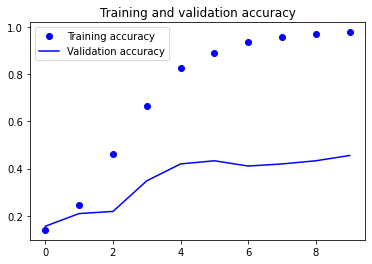

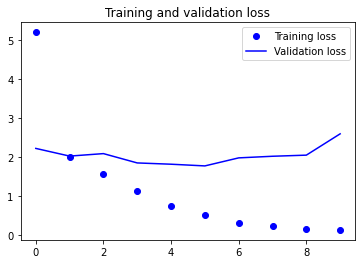

In [98]:
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss      = history.history['loss']
val_loss  = history.history['val_loss']
epochs    = range(len(accuracy))


plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

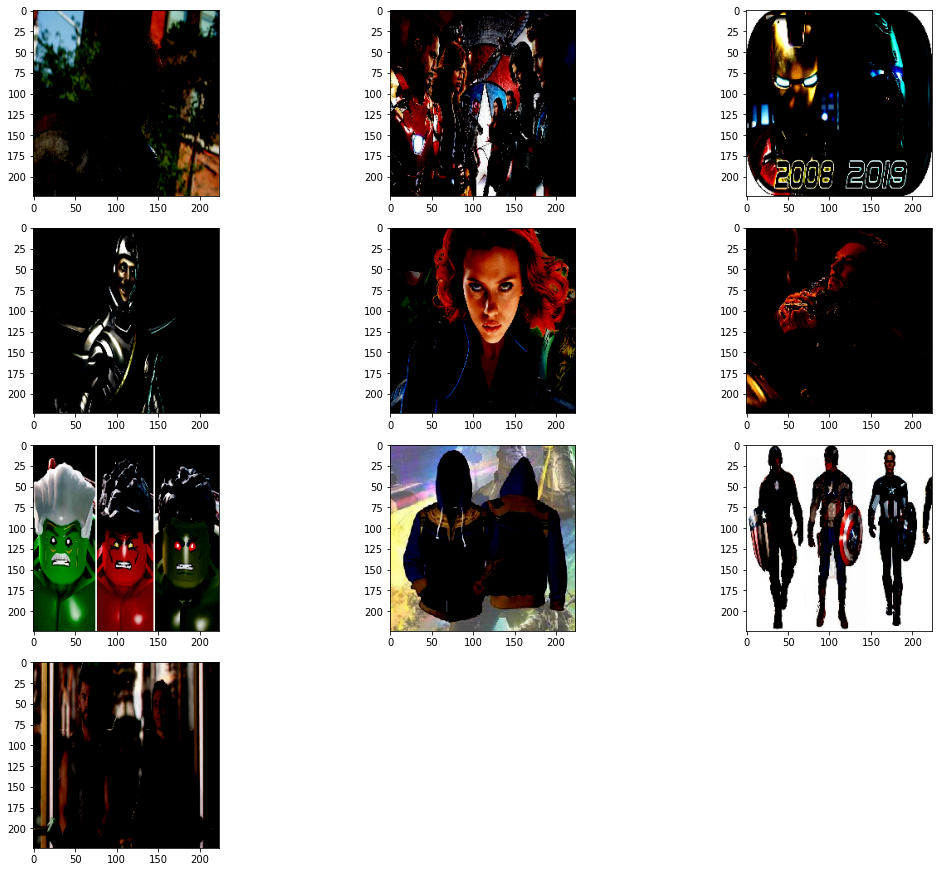

In [99]:
plt.figure(figsize=(15,15))
for i in range(0,10):
    plt.subplot(5,3,i+1)
    for X_batch, Y_batch in train_generator:
        image=X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Salvar Arquitetura do Modelo em arquivo de imagem

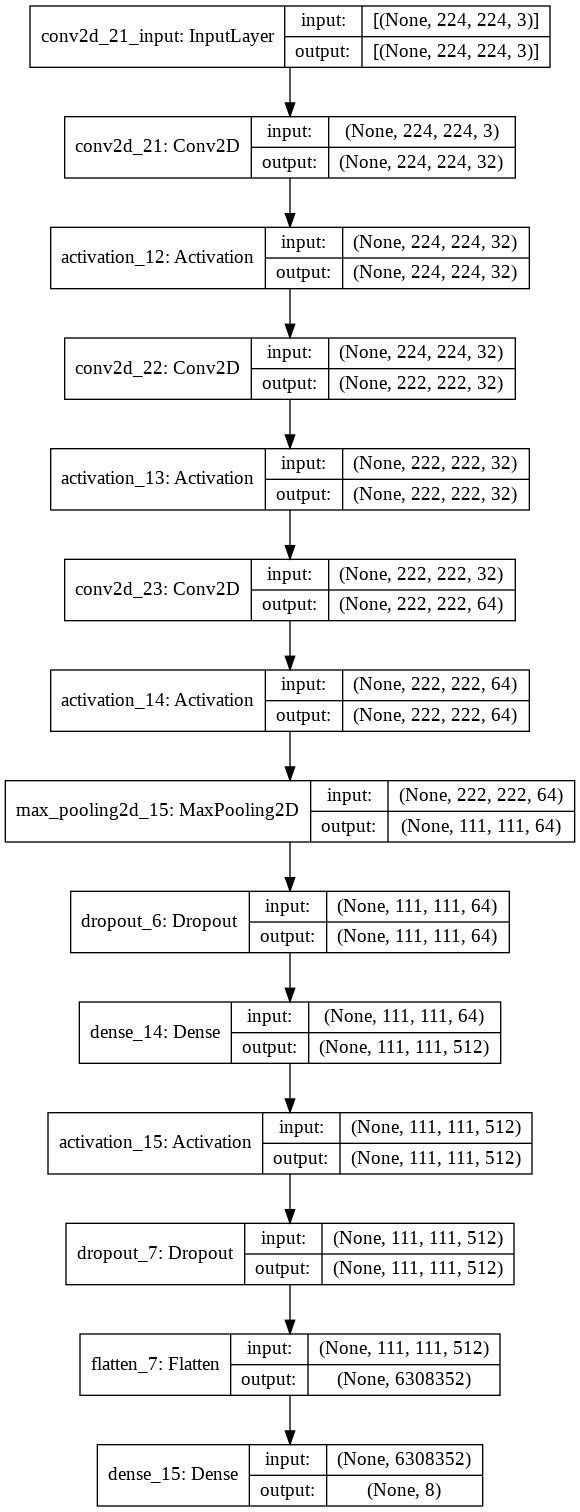

In [100]:
dot_img_file = 'DeepLearning/Marvel/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [101]:
results = model.evaluate( test_generator, verbose=1)
predictions = np.argmax(model.predict(test_generator), axis=1)

class_names = list(test_generator.class_indices.keys())

##cm = confusion_matrix(test_generator.labels, predictions, labels=np.arange(8))

clr = classification_report(test_generator.labels, predictions, labels=np.arange(8), target_names=class_names)

#plt.figure(figsize=(8, 8))
#sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
#plt.xticks(ticks=np.arange(8) + 0.5, labels=class_names, rotation=90)
#plt.yticks(ticks=np.arange(8) + 0.5, labels=class_names, rotation=0)
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
#plt.title("Confusion Matrix")
#plt.show()

print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print('')
print("Classification Report:\n----------------------\n", clr)


3/3 [==============================] - 1s 393ms/step - loss: 2.4029 - accuracy: 0.3750
Test Accuracy: 37.50%

Classification Report:
----------------------
                  precision    recall  f1-score   support

    black_widow       0.17      0.15      0.16        13
captain_america       0.00      0.00      0.00        15
 doctor_strange       0.07      0.25      0.11         8
           hulk       0.00      0.00      0.00         6
        ironman       0.20      0.07      0.10        15
           loki       0.20      0.08      0.12        12
     spider_man       0.28      0.53      0.37        17
         thanos       0.50      0.10      0.17        10

       accuracy                           0.17        96
      macro avg       0.18      0.15      0.13        96
   weighted avg       0.19      0.17      0.14        96



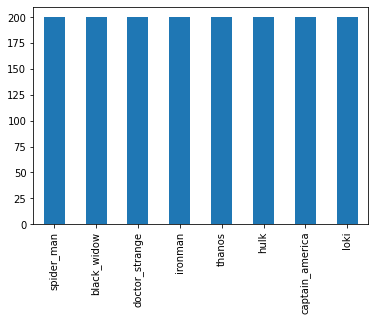

In [102]:
dados['ROTULO'].value_counts().plot.bar()

In [103]:
y_pred = model.predict(test_generator)
y_pred

array([[1.32646218e-01, 2.10626796e-01, 1.98727369e-01, 2.22415343e-01,
        5.27210683e-02, 1.36007234e-01, 2.92041618e-02, 1.76518019e-02],
       [3.92744660e-01, 1.00838438e-01, 2.51689762e-01, 1.67628508e-02,
        8.47746581e-02, 2.26395931e-02, 8.27443004e-02, 4.78056781e-02],
       [6.18680343e-02, 1.11716367e-01, 5.75349629e-02, 4.41274077e-01,
        1.36194661e-01, 1.53401688e-01, 2.44316813e-02, 1.35786068e-02],
       [2.47175223e-03, 5.51726855e-03, 7.23769963e-01, 7.43854092e-03,
        1.76649019e-01, 7.69012515e-03, 7.61761814e-02, 2.87127623e-04],
       [1.75713688e-01, 1.05852348e-04, 3.67726982e-02, 2.01728268e-04,
        3.39620598e-02, 7.52586782e-01, 5.62807661e-04, 9.43226260e-05],
       [1.29506411e-02, 4.48084902e-03, 6.84278905e-01, 8.51789676e-03,
        3.02170031e-02, 5.42168319e-03, 2.53986359e-01, 1.46724095e-04],
       [9.78726923e-01, 1.53325859e-03, 3.76480934e-03, 9.56940872e-04,
        9.58363339e-03, 1.59596733e-03, 3.60423862e-03, 2.